In [19]:
from sklearn import datasets
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import time
# use seaborn plotting style defaults
import seaborn as sns; sns.set()
import pylab
import sklearn.decomposition as dec

In [20]:
iris = datasets.load_iris()
x = iris.data # physical measurements
y = iris.target # actual species for visualization

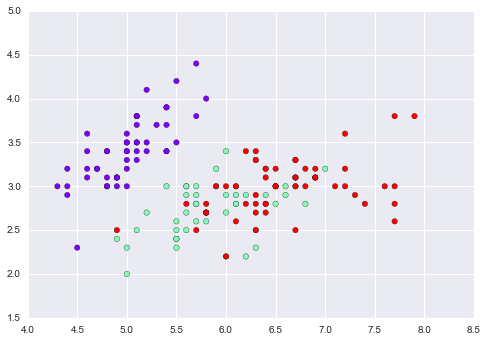

In [23]:
# original data
plt.scatter(x[:,0], x[:,1], c=y,s=30, cmap=plt.cm.rainbow);


In [24]:
%matplotlib qt 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(xs=x[:,0],ys=x[:,1],zs = x[:,2], c=y, s=50, cmap=plt.cm.rainbow)
plt.show()

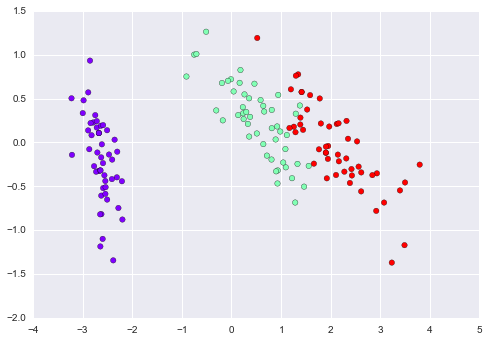

In [89]:
sklearn_pca = dec.PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(x)
plt.scatter(Y_sklearn[:,0], Y_sklearn[:,1], c=y,
            s=30, cmap=plt.cm.rainbow);

In [90]:
sklearn_pca.explained_variance_ratio_

array([ 0.92461621,  0.05301557])

[ 0.92461621  0.05301557  0.01718514  0.00518309]


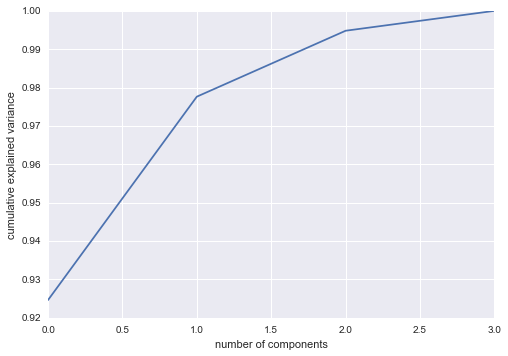

In [91]:
pca = dec.PCA().fit(x)
print pca.explained_variance_ratio_
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

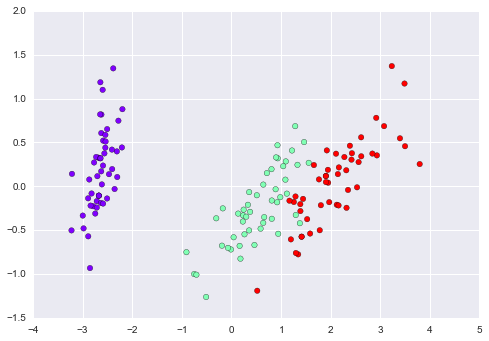

In [92]:
sklearn_pca = dec.KernelPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(x)
plt.scatter(Y_sklearn[:,0], Y_sklearn[:,1], c=y,
            s=30, cmap=plt.cm.rainbow);

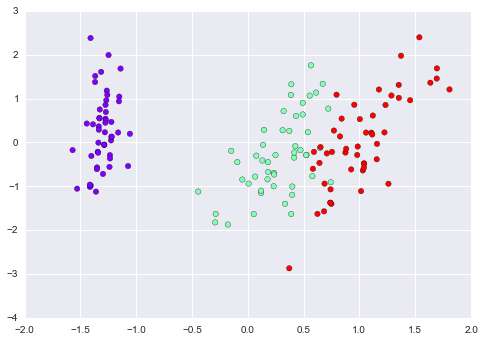

In [93]:
sklearn_pca = dec.FactorAnalysis(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(x)
plt.scatter(Y_sklearn[:,0], Y_sklearn[:,1], c=y,
            s=30, cmap=plt.cm.rainbow);

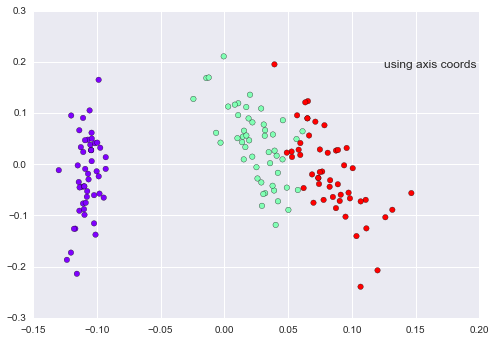

In [94]:
sklearn_pca = dec.FastICA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(x)
plt.scatter(Y_sklearn[:,0], Y_sklearn[:,1], c=y,
            s=30, cmap=plt.cm.rainbow);
pylab.text(0.125,0.19,'using axis coords')

Wall time: 367 ms


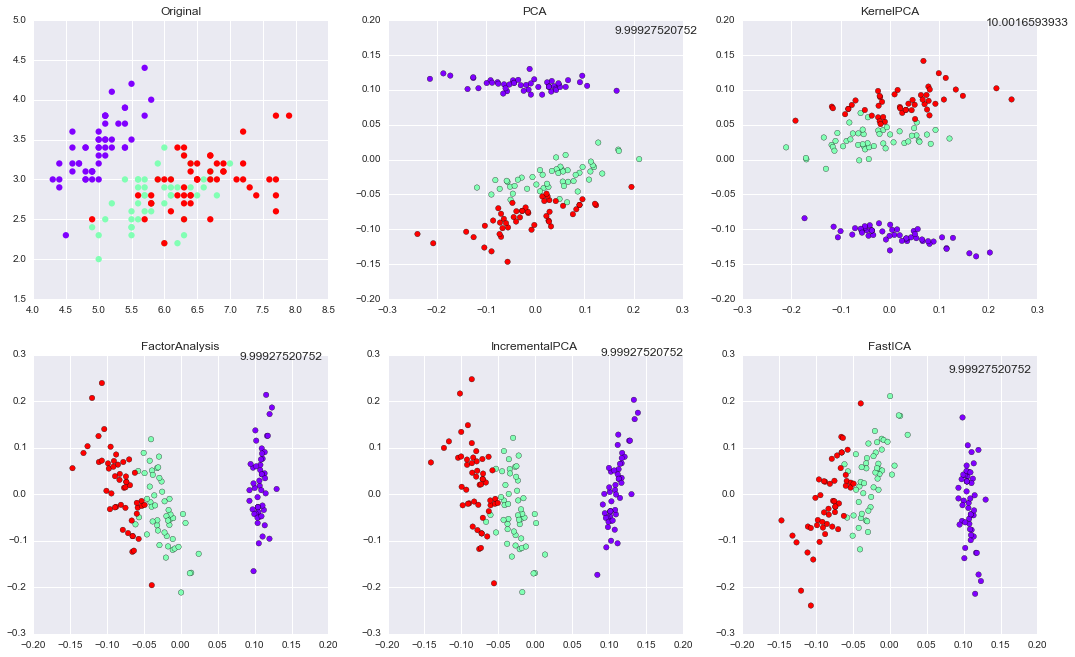

In [95]:
%%time
plt.figure(figsize=(18,11));
plt.subplot(231);
plt.scatter(x[:,0], x[:,1], c=y, s=40,
            linewidths=0, cmap=plt.cm.rainbow);
plt.title("Original");

for i, est in enumerate([
        dec.PCA(n_components=2),
        dec.KernelPCA(n_components=2),
        dec.FactorAnalysis(n_components=2),
        dec.IncrementalPCA(n_components=2),
        dec.FastICA(n_components=2),
    ]):
    plt.subplot(232 + i);
    a = time.time()
    Y_sklearn = sklearn_pca.fit_transform(x)
    b = time.time()
    plt.scatter(Y_sklearn[:,0], Y_sklearn[:,1], c=y,
            s=30, cmap=plt.cm.rainbow);
    plt.title(est.__class__.__name__);
    pylab.text(Y_sklearn[:,0].max()-0.05,Y_sklearn[:,1].max()+0.05,(b-a)*10000)

In [75]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [76]:
pca = dec.PCA(n_components=2)
X_transformed = pca.fit_transform(X)
print X.shape
print y.shape
print X_transformed.shape

(1797L, 64L)
(1797L,)
(1797L, 2L)


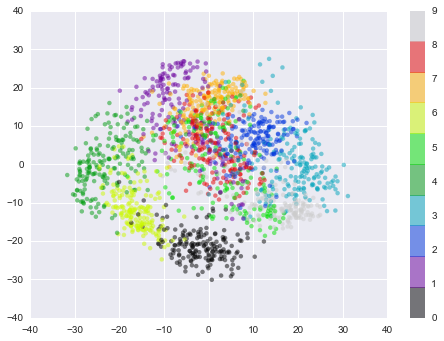

In [79]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

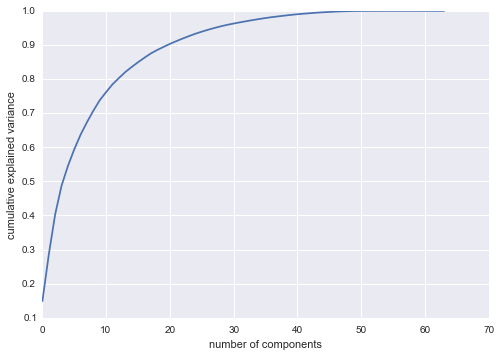

In [82]:
pca = dec.PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');